In [ ]:
【案例分析1】考虑到时间还有6个月的股票欧式看涨期权和看跌期权。
标的股票在2个月和5个月后各有一个除息日，每个除息日的红利期望值为$0.50.
已知当前股票价格为$40,行权价格是$40，股票的年波动率为40%，无风险利率为9%。
试求两种期权的价格。

link: https://zhuanlan.zhihu.com/p/256356619
        
S0=40（基础资产在初始0时刻的价格） 
K=40（期权的执行价格） 
r=0.09（无风险利率） 
σ=0.3（基础资产价格百分比（收益率）的年化波动率） 
T=0.5（期权合约的期限（年））
D1=0.50(红利期望值) 
t1=2/12 t2=5/12（时间）


In [5]:
#答案
import numpy as np
def call_BSM(S,K,sigma,r,T):
    '''BSM模型计算看涨期权的价格
    S:期权基础资产的价格；
    K：期权的执行价格；
    V:支付红利的现值;
    sigma:基础资产价格百分比变化的年化波动率；
    r:无风险收益率；
    T：期权合约的剩余期限；'''
    import numpy as np
    from scipy.stats import norm
    d1=(np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    return (S-V)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

def put_BSM(S,K,V,sigma,r,T):
    '''BSM模型计算看跌期权的价格
    S:期权基础资产的价格；
    K：期权的执行价格；
    V:支付红利的现值;
    sigma:基础资产价格百分比变化的年化波动率；
    r:无风险收益率；
    T：期权合约的剩余期限；'''
    import numpy as np
    from scipy.stats import norm
    d1=(np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2)-(S-V)*norm.cdf(-d1)

A=call_BSM(S=40,K=40,V=0.5*np.exp(-0.09*2/12)+0.5*np.exp(-0.09*5/12),sigma=0.3,r=0.09,T=0.5)
B=put_BSM(S=40,K=40,V=0.5*np.exp(-0.09*2/12)+0.5*np.exp(-0.09*5/12),sigma=0.3,r=0.09,T=0.5)
print('看涨期权的价格：',round(A,3))
print('看跌期权的价格：',round(B,3))

看涨期权的价格： 3.671
看跌期权的价格： 2.885


In [28]:
#自己练手修改
import numpy as np
from scipy.stats import norm
#正态分布函数库：https://blog.csdn.net/lanhezhong/article/details/105677178
r = 0.09#无风险利率
#标的股票在2个月和5个月后各有一个除息日
t1 = 2/12
t2 = 5/12
D1 = float(input('请输入第一期的红利：'))
D2 = float(input('请输入第二期的红利：'))
V = D1*np.exp(-r*t1) + D2*np.exp(-r*t2) 
#e^2：np.exp(2) c^(1/2):np.sqrt(c) ln(c):np.log(c)

def call_BSM(S,K,sigma,T):
    d1 = (np.log((S-V)/K))+((r+0.5*sigma**2)*T)/sigma*np.sqrt(T)
    d2 = d1 - (sigma*np.sqrt(T))
    return (S-V)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

Final_P = call_BSM(40,40,0.3,0.5)

print('European call option_price is: ',Final_P)
    
    

请输入第一期的红利：0.5
请输入第二期的红利：0.5
European call option_price is:  3.663831489392283


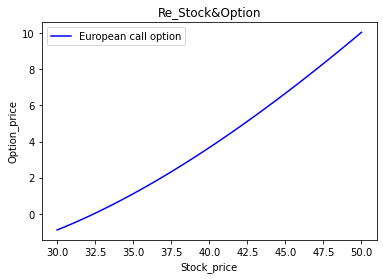

In [29]:
import matplotlib.pyplot as plt
S_list=np.linspace(30,50,100)
call_list1=call_BSM(S=S_list,K=40,sigma=0.3,T=0.5)
plt.title('Re_Stock&Option')
plt.xlabel('Stock_price')
plt.ylabel('Option_price')
plt.plot(S_list,call_list1,'b-',label='European call option')
plt.legend()
plt.show()


